# Unsupervised Analysis on Public Posts about Juice using K-Means Clustering

## Executive Summary

Most of the time, text data doesn't have a label. There are basic analysis that can be done in this kind of data like word frequency and collocation. However, advance analysis can also be done if the data is labelled. These kind of analysis includes text classification and sentiment analysis. Hence, this project uses an unsupervised learning method to label text data. The data is from public posts in Singapore around juices and beverages. The timeframe of the data is from November 2018 to May 2019. Basic analysis will be done first before doing the advanced analysis. Using K-means clustering to classify, it showed five categories of posts which were **fruit juices**, **shared ideas about juices**, **drinking juices**, **making juices**, **GAGT Users** and **Orange Juices**. After doing this, another K-means clustering is done to define the sentiments per post. It showed that there were more juice lovers in Singapore. Further improvements can be done like using other clustering methods to get better classification. Also, a dashboard of this project is published at https://public.tableau.com/profile/rsdnoob#!/vizhome/SingaporeanPostsaboutJuiceSentimentalAnalysis/Dashboard1.

In [1]:
## importing dependencies
from text_analysis import *

## Dataset

The dataset contains public posts from the top social media channels in Singapore around juices & beverages. It contains 13 columns which are:

- Post ID: identifier for each row in the dataset
- Post Date: date on which the social media post was made
- Title: title of the social media thread
- Content: content of the social media thread
- Post Type: indicates whethere the social media post is a original/first content of a thread (ARTICLE) or wether the post is a comment to the original/first content of a thread
- URL: the link to the post
- Channel Name: the name of the social media page where the post was made
- Channel Country: the country of origin of the social media post
- Channel Site Type: the social media  site where the post was made
    - SOCIAL_NETWORKING = Facebook
    - MICROBLOG = Twitter
    - FORUM = Forums
- Channel Language: The language of the post
- Channel URL: The link/url of the social media page where the post was made
- Voice Name: the name of the social media profile which made the post

Most of the data processing will be done in **Content** column. Due to limited time, there is little data exploration on the other columns.

**pandas** python module will be used to open and manipulate the data.

In [2]:
# Load the dataset
df = pd.read_excel('data/Social_Dataset.xlsx', sheet_name='Raw Data')

The dataset contains **8072** posts. However, this will be trim down later after text cleaning.

In [3]:
df.shape

(8072, 13)

Most of the language used in this dataset is English. This information will be used later for text cleaning.

In [4]:
df.groupby('Channel Language').count()['Post ID']

Channel Language
en_GB     271
en_US    7778
ms_MY       7
zh_CN      15
zh_TW       1
Name: Post ID, dtype: int64

There are more comments than articles in this dataset. It can be useful for removing contents that are duplicate of another content from different users.

In [5]:
df.groupby('Post Type').count()['Post ID']

Post Type
ARTICLE     594
COMMENT    7478
Name: Post ID, dtype: int64

## Text cleaning

Cleaning the data is important since it can reduce the insights that can be discovered from it. Below are the steps to clean the text data:

- remove hashtag, @user, link of a post: this will dilute the word frequency since there can be some URLs that are shared in multiple posts
- convert text to lower case: this will be used since capitalized and non-capitalized words are still the same word after getting the lower case
- remove punctuations attached to each word: remove dots or commas
- remove remaining characters that are not alphabetic: remove special characters like emojis transformed into some special character
- filter out stopwords: as mentioned earlier, English is the most used language in this dataset. Hence, English stopwords will be used here
- filter out searched words: The words **juice**, **juices**, **beverage** and **beverages** will be removed since it will affect the word count. 
- lemmatize the words: this method is used to get the root of a word
- filter out one-letter words: remove one-letter word generated after lemmatazing the words

After this, basic and advance analysis can now be done.

In [39]:
df = dataframe_cleaner(df)
df = df[df['duplicates']==0].reset_index(drop=True)

## Basic Analysis

Word frequency and concordance will be done in this part.

### Word frequency

This analysis will be useful to know which words are usually associated to a post about juices.

As seen on the chart below, **say** is the most used word in social media post about juices. Remember that lemmatization was applied in text cleaning, hence the word **say** can be a word from **said**. This implies that topics about juices are usually shared by other people through their posts. An example of this is,

*“The best juices are the boring ones,” **said** no one ever. With their funky fresh flavours, the newest juice bar in town has a wide range of exotic ingredients (and some are drop-dead gorgeous)! See them for yourself!*

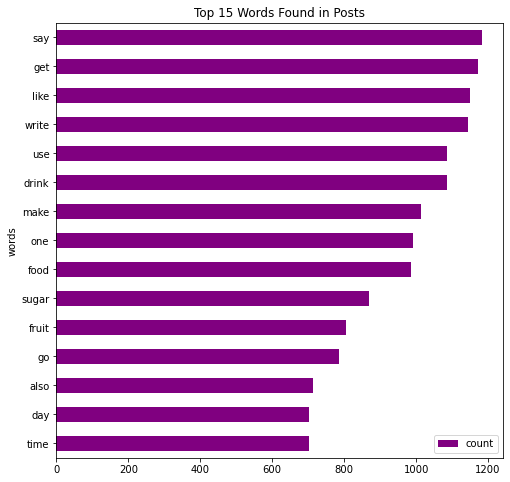

In [40]:
word_frequency(df)

### Collocation

Collocation is useful if the word frequency doesn't make sense. It is done by getting pairs (bi-gram) or triwise (tri-gram) of words in a single sentence or post.

In [42]:
df_bigrams, df_trigrams = collocate_df(df)

Below is the top 5 words after doing the collocation technique for bi-grams. **use gagt** is a community in Singapore where people talk about different topics including juices. An example of this post is,

*invigo79 wrote: So people wont misunderstand. Apple juice look like champagne in term of colour. Sent from Home using **GAGT noob**. apple juice look like champagne ?*

It is hard to clean this part since some posts with **use gagt** contains useful information.

In [43]:
df_bigrams.groupby('bigrams').count().sort_values(by=0, ascending=False)[:5]

,0
bigrams,
use gagt,298
sugar cane,138
weight loss,131
lose weight,80
raw water,78


There are lesser occurence of tri-grams compared to tri-grams. It is understandable since it has more words in a set. An example of a post where the top tri-grams (**rm per gallon**) is used,

*5-3-2019 4:49 AMsgbuffett said: https://m.malaysiakini.com/letters/461555 There was once a generous orchard owner who owned multiple mango trees. The trees had an abundance of fruits such that he shared with his neighbour, who had no land to grow them. As decades passed, the neighbour improvised the mango to canned mango juice and made his fortune. Despite being more prosperous, the neighbour continued to exploit the orchard owner to live up to the deal, even though the trees do not bear as many mangoes now. If the orchard owner is Malaysia, I am sure most of us could guess the rest of the metaphorical expressions in the story correctly. In accordance to the Water Agreement 1962, Singapore may extract 250 million gallons of raw water per day from the Johor River, with a condition that two percent or 5 million gallons of treated water were supplied back daily. Given that it costs Singapore RM 2.40 to treat 1,000 gallons of raw water, Singapore subsidised the raw water by **RM 1.90 per 1,000 gallons**, while Johor supports **RM 0.50 per 1000 gallons**. Johor sells the treated water to its Johoreans at **RM 3.95 per 1,000 gallons**, enabling it to earn a profit of **RM 3.45 per 1,000 gallons**. Analysing the figures through the current domestic water tariff rate and water treatment cost, the 5 million gallons a day deal allows Johor to make RM17,250 per day, while Singapore spends RM 9,550 daily. The other side of the coin seems to be overshadowed by the presumably high figures. It is mind-blowing to learn that if Johor decides to keep its 250 million gallons of raw water, with the aforementioned treatment cost, the profit calculates to RM 380,000 per day. On the other hand, with the purchase of raw water at a trifling RM 0.03 per 1000 gallons, the same treatment cost and current domestic water tariff rate by Public Utilities Board of Singapore, our neighbour makes a whopping RM 8,739,858 daily. As we speak, through the Water Agreement, Malaysia loses RM 362,750 while Singapore gains RM 8.7 million daily. Is that a â€˜fairâ€™ agreement? It is baffling to learn that raw water is not considered as a natural resource but, a commodity by Singapore. When Malaysia wanted to review the price in 1987 as it felt its natural resource was exploited, Singapore refused to cooperate. Can we say you bought some goods from China at 50c and you sell the product at $10 in Singapore, very unfair to China?*

Remeber that in the data cleaning, non-alphabet characters were removed. It shows that text cleaning is importan when doing text analysis. If the numbers were not removed, it will show a different set of tri-grams which possibly doesn't make sense.

In [44]:
df_trigrams.groupby('trigrams').count().sort_values(by=0, ascending=False)[:5]

,0
trigrams,
rm per gallon,65
mercedes benz use,51
benz use gagt,51
sent mercedes benz,51
hardwarezone forum app,42


After getting insights from collocation analysis, advanced analysis can now be done.

## Advanced Analysis (Unsupervised)

Unsupervised means there are no labels in the dataset and it will be created using data science techniques. The method that will be used in this project is K-means clustering. There other clustering methods, however, due to time constraint of this project, this is the only clustering method that will  be used here.

### Text Classification

The first step in this analysis is to get trainable data. This means to transform the text data into numerical values.

In [47]:
# Vectorize the cleaned data
# Get only the nonzeros features in the vectorized bag of words
bow_X, nonzeros = vectorize(df.cleaned_content)

After transforming the data, the next step is to identify the number of clusters. As of now, there are no automatic methods to do this. However, there are statistical tests that can be done to make identifying the number of clusters easier. In this projet, calinski harabasz ascore and silhouette score will be used.

*Use this as a reference:*
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

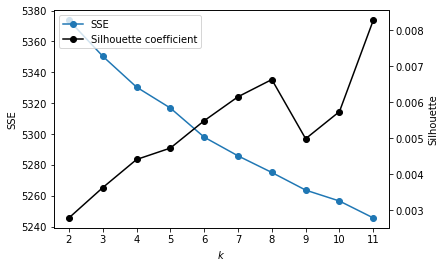

In [48]:
# Find clusters using internal validation
# Sum of squares distances to centroids
# Silhouette coefficient
res_posts = cluster_range(bow_X, KMeans(random_state=1337), 2, 11)
plot_internal(res_posts['inertias'], res_posts['scs'])

After identifying the number of clusters, it is now possible to train the K-means clustering.

*Note: Since the intersection is between 5 and 6, I tried training the clustering with both those numbers. It showed in a different notebook that **six** clusters is more interpretable.*

In [49]:
# Choose five as number of clusters
kmeans_X = KMeans(random_state=1337, n_clusters=6)
y_predict_X = kmeans_X.fit_predict(bow_X)

In [50]:
# create a new DataFrame containing titles with cluster number (from 0 to 5)
df_new = df_clustered(df, nonzeros, y_predict_X)

C:\Users\Administrator\Documents\JobHunting\Isentia\text_analysis.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


K-means clustering is relatively simple to implement. However, its cons is that there will always be one cluster that contains a lot of data. In this project's case, cluster **3** contains a significant amount of posts compared to other clusters.

In [51]:
# Number of titles per clusters
df_new.groupby(['Cluster']).count()['Post ID']

Cluster
0     344
1     196
2     334
3    4008
4     256
5     308
Name: Post ID, dtype: int64

Below are word clouds for each cluster. It can be seen that there are top words for each cluster. These words serve as the guide on the topics per cluster.

Cluster 0 : Fruit Juices


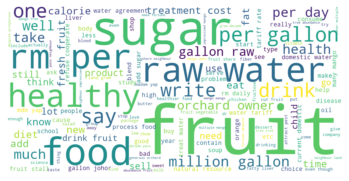

Cluster 1 : Shared Ideas about Juices


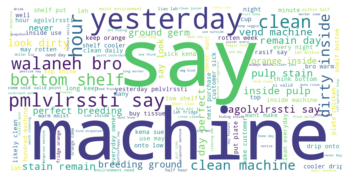

Cluster 2 : Drinking Juices


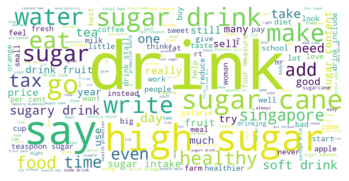

Cluster 3 : Making Juices


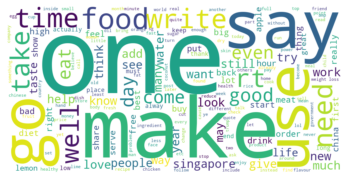

Cluster 4 : GAGT Users


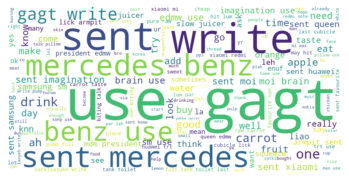

Cluster 5 : Orange Juices


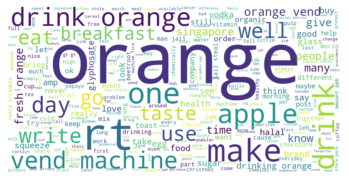

In [53]:
print("Cluster 0 : Fruit Juices")
visualize(df_new, 0)
print("Cluster 1 : Shared Ideas about Juices")
visualize(df_new, 1)
print("Cluster 2 : Drinking Juices")
visualize(df_new, 2)
print("Cluster 3 : Making Juices")
visualize(df_new, 3)
print("Cluster 4 : GAGT Users")
visualize(df_new, 4)
print("Cluster 5 : Orange Juices")
visualize(df_new, 5)

### Sentiment Analysis

After text classification, sentiment analysis can also be done. Sentiment analysis is usually done with labelled data. However, in this project, NLTK and K-means clustering will be combined, so that it will be possible to generate labelled data. Most of the insights in this project can be seen at https://public.tableau.com/profile/rsdnoob#!/vizhome/SingaporeanPostsaboutJuiceSentimentalAnalysis/Dashboard1.

*Note: Check the **text_analysis.py** to see the codes used in this analysis.*

In [55]:
df_sentiments = get_sentiments(df)

Time to build vocab: 0.04 mins
Time to train the model: 0.77 mins


C:\ProgramData\Anaconda3\envs\new_base\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


The pictures below are from the dashboard created using this data.

<img src="img/pic1.PNG">

<img src="img/pic1.PNG">
          
<img src="img/pic1.PNG">

Here is the link on the post on February 16, 2019: https://web.facebook.com/permalink.php?story_fbid=2880190185455025&id=1993145654159487&_rdc=1&_rdr.

## Insights

- Doing an exploratory data analysis (EDA) on the data is useful since it can later in improving the data, e.g. text cleaning.
- Text cleaning is important in text analysis since it improves or worsens the discovery of insgihts.
- Even though it is **Basic** Analysis, there are still a lot of insights that can be discovered.
- If the words **juice**, **juices**, **beverage** and **beverages** are not removed, they will show up as the most frequent words.
- Removing duplicates is important in text cleaning, since if it is not done, then insights from collocations will be affected. It is possible that useless bi-grams or tri-grams may show up.
- Unsupervised learning is useful if there is no labelled data available.
- K-means clustering is helpful for fast implementation of unsupervised learning. However, there are also cons in using it.
- The best take away part in this project is the sentiment analysis. It discovered the Social Media post from Frebruary 16, 2019. **Hence, it proves that the sentiment analysis in this project is useful.**

## Recommendations

- Use other clustering methods for unsupervised learning.
- Use Python's **Dash** to visualize, since it offers more control to the user.

## References

- https://gitlab.datascience.aim.edu/jcuballes/finding-subreddit-topics-through-kmeans-clustering
- https://towardsdatascience.com/unsupervised-sentiment-analysis-a38bf1906483
- https://www.flerlagetwins.com/2019/09/text-analysis.html
- https://monkeylearn.com/text-analysis/